Decision Tree Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

In [3]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Experiment with Different Decision Tree Depths
depths = range(1, 21)
dt_accuracies = []

for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    dt_accuracies.append(accuracy_score(y_test, y_pred_dt))


In [5]:
# Train a Decision Tree classifier with no depth limit
dt_final = DecisionTreeClassifier(random_state=42)
dt_final.fit(X_train, y_train)
y_pred_dt_final = dt_final.predict(X_test)
dt_final_accuracy = accuracy_score(y_test, y_pred_dt_final)


In [6]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)


In [7]:

# Print accuracy scores
print(f"Decision Tree (Best Depth) Accuracy: {max(dt_accuracies):.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Print classification reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_final, target_names=wine.target_names))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=wine.target_names))


Decision Tree (Best Depth) Accuracy: 0.9444
Random Forest Accuracy: 1.0000

Decision Tree Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Random Forest Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



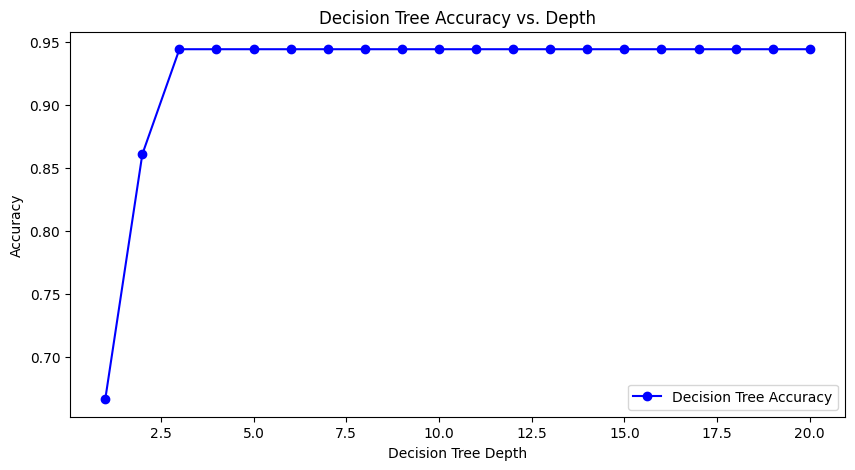

In [8]:
# Plot Accuracy vs. Tree Depth
plt.figure(figsize=(10, 5))
plt.plot(depths, dt_accuracies, marker='o', linestyle='-', color='blue', label='Decision Tree Accuracy')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.legend()
plt.show()


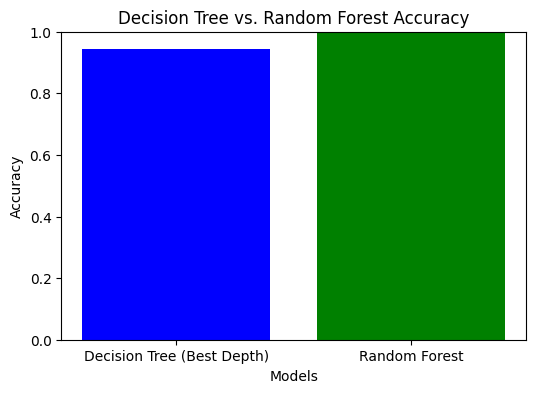

In [9]:
# Plot accuracy comparison between Decision Tree and Random Forest
models = ['Decision Tree (Best Depth)', 'Random Forest']
accuracies = [max(dt_accuracies), rf_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Decision Tree vs. Random Forest Accuracy')
plt.show()